In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install keras.utils

In [ ]:
import os
import matplotlib as plt
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
import random,shutil
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model

In [ ]:
labels = os.listdir("/content/drive/MyDrive/archive/train")
labels

['Open', 'Closed', 'yawn', 'no_yawn']

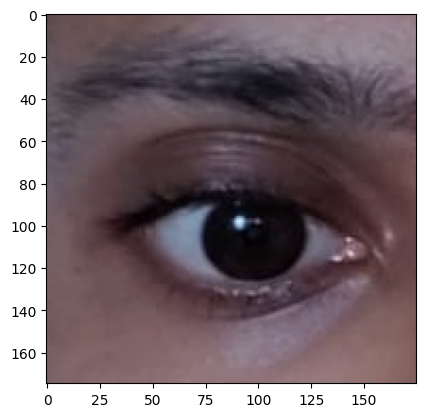

In [ ]:
plt.imshow(plt.imread("/content/drive/MyDrive/archive/train/Open/_0.jpg"))

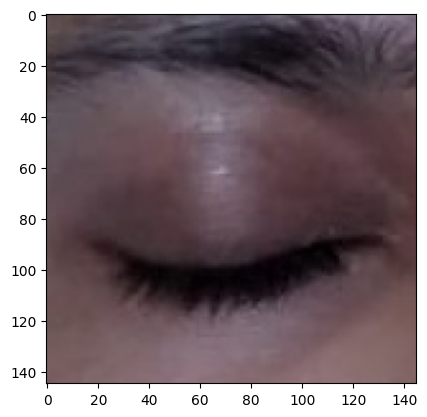

In [ ]:
plt.imshow(plt.imread("/content/drive/MyDrive/archive/train/Closed/_0.jpg"))

In [ ]:
a = plt.imread("/content/drive/MyDrive/archive/train/yawn/10.jpg")
a.shape

(480, 640, 3)

In [ ]:
def generator(dir, gen=image.ImageDataGenerator(rescale=1./255), shuffle=True,batch_size=1,target_size=(24,24),class_mode='binary' ):
    return gen.flow_from_directory(dir,batch_size=batch_size,shuffle=shuffle,color_mode='grayscale',class_mode=class_mode,target_size=target_size)

BS= 32
TS=(24,24)
train_batch= generator('/content/drive/MyDrive/archive/train',shuffle=True, batch_size=BS,target_size=TS)
valid_batch= generator('/content/drive/MyDrive/archive/valid',shuffle=True, batch_size=BS,target_size=TS)
SPE= len(train_batch.classes)//BS
VS = len(valid_batch.classes)//BS
print(SPE,VS)


Found 1440 images belonging to 4 classes.
Found 1460 images belonging to 4 classes.
45 45


In [ ]:
img,labels= next(train_batch)
print(labels)
print(labels.shape)
print(img.shape)

[2. 0. 1. 3. 2. 2. 1. 2. 3. 3. 2. 3. 3. 3. 3. 2. 0. 2. 0. 1. 1. 2. 3. 3.
 1. 0. 2. 0. 1. 1. 0. 0.]
(32,)
(32, 24, 24, 1)


In [ ]:

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit_generator(train_batch, validation_data=valid_batch, epochs=15, steps_per_epoch=SPE, validation_steps=VS)
model.save('models/cnnCat2.h5', overwrite=True)

<ipython-input-5-6096765651b6>:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_batch, validation_data=valid_batch, epochs=15, steps_per_epoch=SPE, validation_steps=VS)


Epoch 1/15
45/45 [==============================] - 683s 15s/step - loss: -20998.0039 - accuracy: 0.2569 - val_loss: -132940.5938 - val_accuracy: 0.2694
Epoch 2/15
45/45 [==============================] - 33s 747ms/step - loss: -2376248.5000 - accuracy: 0.2569 - val_loss: -8621522.0000 - val_accuracy: 0.2694
Epoch 3/15
45/45 [==============================] - 22s 499ms/step - loss: -43209024.0000 - accuracy: 0.2569 - val_loss: -109122296.0000 - val_accuracy: 0.2715
Epoch 4/15
45/45 [==============================] - 23s 521ms/step - loss: -328368640.0000 - accuracy: 0.2569 - val_loss: -654258560.0000 - val_accuracy: 0.2722
Epoch 5/15
45/45 [==============================] - 23s 518ms/step - loss: -1476663936.0000 - accuracy: 0.2569 - val_loss: -2582048256.0000 - val_accuracy: 0.2708
Epoch 6/15
45/45 [==============================] - 24s 530ms/step - loss: -4843776000.0000 - accuracy: 0.2569 - val_loss: -7617918976.0000 - val_accuracy: 0.2729
Epoch 7/15
45/45 [=========================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 20, 20, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 64)        0

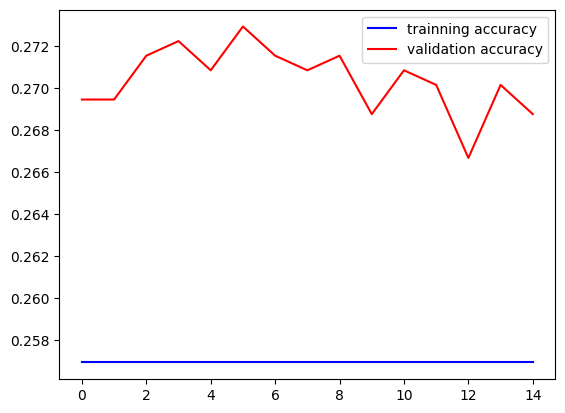

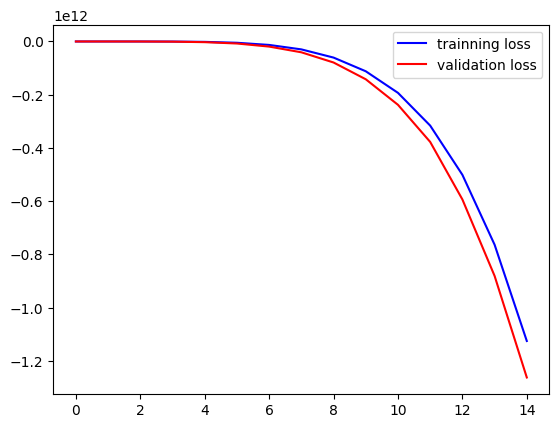

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate_generator(valid_batch, steps=VS)

# Print the test accuracy
print(f"Test Accuracy: {int(test_accuracy * 100)}%")


<ipython-input-11-8d9948a54881>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = model.evaluate_generator(valid_batch, steps=VS)


Test Accuracy: 26%


In [ ]:
!pip install keras_metrics

In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import time
import tensorflow as tf
from keras_metrics import f1_score
import PIL
import io

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:

# Load the pre-trained drowsiness detection model
model_d = tf.keras.models.load_model("/content/drive/MyDrive/archive/cnnCat2.h5", custom_objects={'f1_score': f1_score})



In [ ]:
def prepare(image):
    # Resize the image to 24x24
    image = cv2.resize(image, (24, 24))
    # Normalize the image to have values between 0 and 1
    image = image / 255.0
    # Add a new axis to represent the batch dimension
    image = np.expand_dims(image, axis=0)
    return image

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x, y, w, h) in faces:
      face_image = gray[y:y + h, x:x + w]
      processed_image = prepare(face_image)
      drowsiness_detection = model_d.predict(processed_image)
      status = "Awake" if np.argmax(drowsiness_detection) == 0 else "Drowsy"
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)
      bbox_array = cv2.putText(bbox_array, f"Drowsiness: {status}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    # Convert RGB image to RGBA
    bbox_array = cv2.cvtColor(bbox_array, cv2.COLOR_RGB2RGBA)
    bbox_array[:,:,3] = (bbox_array.max(axis=2) > 0 ).astype(int) * 255

    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

    # Convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 25ms/step
